## Importing Packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Reading the data

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Selecting Feature- ENGINESIZE to predict CO2EMISSIONS

In [39]:
cdf = df[['ENGINESIZE','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


### Plotting ENGINESIZE against CO2EMISSIONS

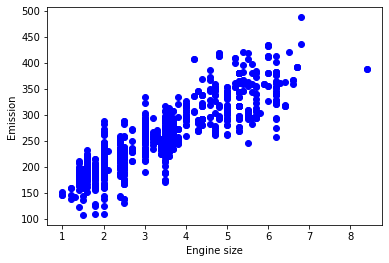

In [40]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Splitting the dataset into training and test datasets

In [10]:
from sklearn.model_selection import train_test_split

X=cdf[['ENGINESIZE']]
y=cdf[['CO2EMISSIONS']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

## Building the Model and training it

In [37]:
from sklearn import linear_model

regr = linear_model.LinearRegression().fit(X_train, y_train)
y_res = regr.predict(X_test)

print ('Coefficient: ', regr.coef_,' Intercept: ',regr.intercept_)

Coefficient:  [[39.116937]]  Intercept:  [125.14677576]


## Plotting the Final Regression Model on the Test Data

Text(0, 0.5, 'Emission')

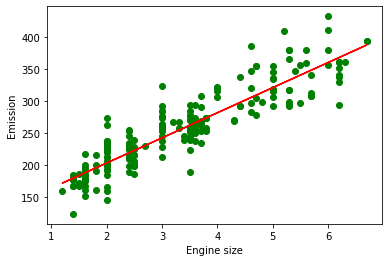

In [33]:
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, regr.coef_[0][0]*X_test + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation of the Model

In [38]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_res , y_test) )

R2-score: 0.77


R-2 score is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.
That means that a higher R-2 score indicates better working efficiency of the model